# What to expect

In notebooks 2A and 2B we took a first look at the results from STAR, normalizing them and viewing them with DeSeq2. In this session we are going to look at which genes are the most highly differentially expressed, and investigate the GO terms and pathways associated with them. We will do this first for the example dataset <i>Schistosoma mansoni</i>, and then in notebook 3B you will repeat the process for your chosen dataset.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [2]:
# load in the counts and metadata again
counts = pd.read_csv("analysis/Schistosoma_mansoni/star/ReadsPerGene.csv", index_col=0).T
metadata = pd.read_csv("data/Schistosoma_mansoni/metadata.csv", index_col=0)

# restrict to the 2 stages we want to compare
counts_s = counts[metadata["stage"].isin(["cercarium","24 hr schistosomulum"])]
metadata_s = metadata[metadata["stage"].isin(["cercarium","24 hr schistosomulum"])]

# create deseq2 dataset object
dds = DeseqDataSet(
    counts=counts_s,
    metadata=metadata_s,
    design_factors="stage",  # compare samples based on the developmental "stage"
    refit_cooks=True
)

# Differential Expression analysis

In [3]:
# Run DeSeq2
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.69 seconds.

Fitting dispersion trend curve...
... done in 0.45 seconds.

Fitting MAP dispersions...
... done in 2.06 seconds.

Fitting LFCs...
... done in 1.05 seconds.

Replacing 0 outlier genes.



In [4]:
# Summarize results
stat_res=DeseqStats(dds)
stat_res.summary()
res=stat_res.results_df

Running Wald tests...


Log2 fold change & Wald test p-value: stage cercarium vs 24 hr schistosomulum
                      baseMean  log2FoldChange     lfcSE      stat  \
gene                                                                 
gene:Smp_000020    4894.181166        0.220493  0.167252  1.318327   
gene:Smp_000030   18780.967017        0.640823  0.113365  5.652740   
gene:Smp_000040    5663.668190       -0.609067  0.135692 -4.488592   
gene:Smp_000050    2824.491025       -1.787653  0.281843 -6.342716   
gene:Smp_000070    1794.569198        0.465374  0.162841  2.857833   
...                        ...             ...       ...       ...   
gene:Smp_900070   41334.608763        2.999898  0.434540  6.903617   
gene:Smp_900080    6394.476687        3.246539  0.357609  9.078456   
gene:Smp_900090  159155.732267        4.304425  0.436356  9.864474   
gene:Smp_900100    5753.668599        1.824721  0.937269  1.946848   
gene:Smp_900110  114952.325564        3.702547  0.455867  8.121987   

           

... done in 1.30 seconds.



<div class="alert alert-block alert-warning">

Question:

1. How many genes have normalized baseMean greater than 10? Are these significant?
2. How many genes are significantly differentially expressed?
3. For how many of these significant genes is the fold change (FC) greater than 2 or less than 0.5?

In [9]:
# Filter results with baseMean<10 so that gene expressions close to zero don't skew results
res=res[res.baseMean>=10]
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene,,,,,,
gene:Smp_000020,4894.181166,0.220493,0.167252,1.318327,1.873941e-01,2.438677e-01
gene:Smp_000030,18780.967017,0.640823,0.113365,5.652740,1.579103e-08,4.805223e-08
gene:Smp_000040,5663.668190,-0.609067,0.135692,-4.488592,7.169553e-06,1.706543e-05
gene:Smp_000050,2824.491025,-1.787653,0.281843,-6.342716,2.257493e-10,7.998360e-10
gene:Smp_000070,1794.569198,0.465374,0.162841,2.857833,4.265445e-03,7.382411e-03
...,...,...,...,...,...,...
gene:Smp_900070,41334.608763,2.999898,0.434540,6.903617,5.069497e-12,2.030653e-11
gene:Smp_900080,6394.476687,3.246539,0.357609,9.078456,1.101254e-19,7.289801e-19
gene:Smp_900090,159155.732267,4.304425,0.436356,9.864474,5.934457e-23,4.727768e-22


In [10]:
sum(res.padj<0.05)

6192

In [11]:
# Get list of only genes that have a fold change FC > 2 or FC < 0.5
sigs=res[(res.padj<0.05)&(abs(res.log2FoldChange)>1)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene,,,,,,
gene:Smp_000050,2824.491025,-1.787653,0.281843,-6.342716,2.257493e-10,7.998360e-10
gene:Smp_000080,12.055362,-1.996872,0.907740,-2.199829,2.781904e-02,4.272833e-02
gene:Smp_000100,26042.364286,2.741560,0.086620,31.650315,7.507979e-220,7.171621e-217
gene:Smp_000150,5933.919227,1.861954,0.238966,7.791724,6.610089e-15,3.231298e-14
gene:Smp_000160,821.898894,-3.572022,0.229269,-15.580015,9.953195e-55,3.347638e-53
...,...,...,...,...,...,...
gene:Smp_900060,16889.104818,2.434262,0.781077,3.116543,1.829848e-03,3.337542e-03
gene:Smp_900070,41334.608763,2.999898,0.434540,6.903617,5.069497e-12,2.030653e-11
gene:Smp_900080,6394.476687,3.246539,0.357609,9.078456,1.101254e-19,7.289801e-19


In [ ]:
! pip install --quiet fastcluster

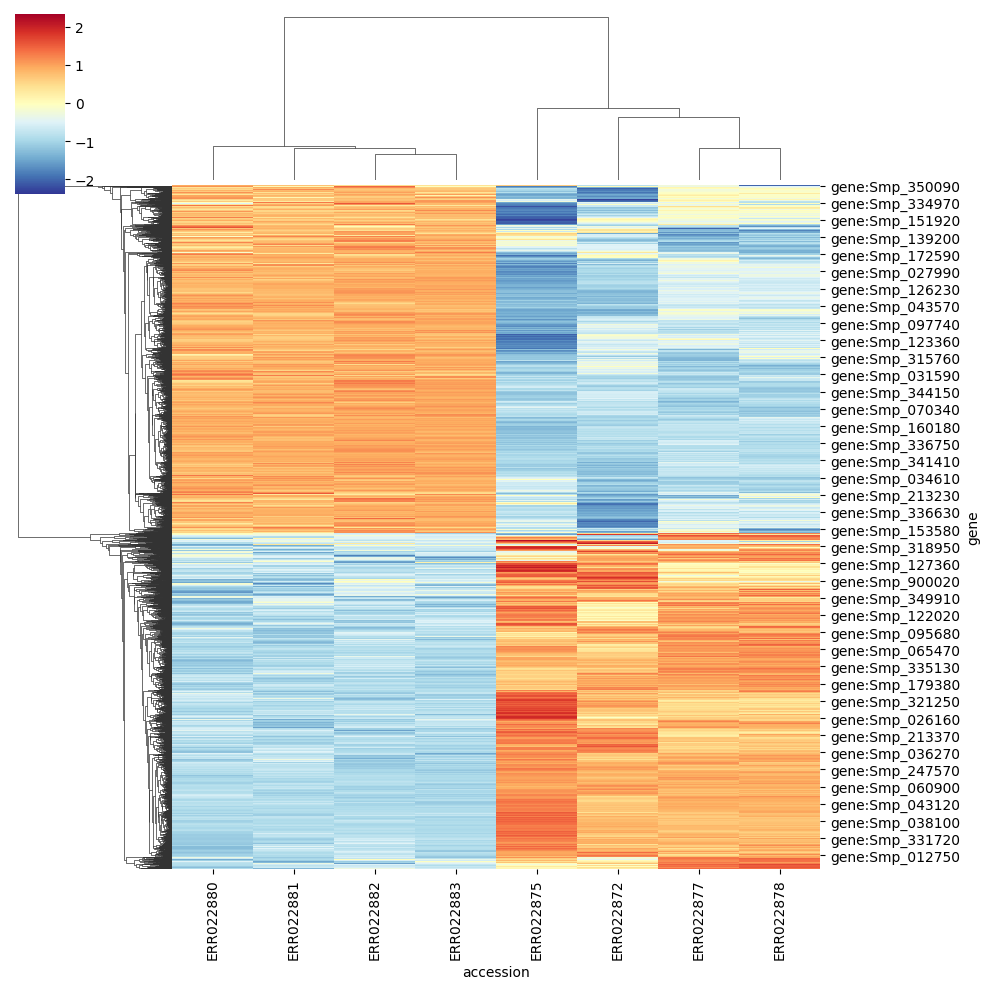

In [12]:
# Create clustermap for these significant genes
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
dds_sigs = dds[:, sigs.index]

grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [ ]:
# Volcano plot
# To make sure the p-values are easier to interpret, the lambda function applies a log10 transformation 
# the - sign is to make value positive
# s=1 is the size of the dots
plt.scatter(x=res['log2FoldChange'],y=res['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = res[(res['log2FoldChange']<=-2)&(res['padj']<0.01)]
up = res[(res['log2FoldChange']>=2)&(res['padj']<0.01)]

plt.scatter(x=down['log2FoldChange'],y=down['padj'].apply(lambda x:-np.log10(x)),s=1,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FoldChange'],y=up['padj'].apply(lambda x:-np.log10(x)),s=1,label="Up-regulated",color="red")

plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10 adjusted P value")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

In [ ]:
stat_res.summary(lfc_null=0.1, alt_hypothesis="greaterAbs")
stat_res.plot_MA(s=20)

# GO term analysis

In [ ]:
conda install --yes --quiet bioconda::bioconductor-goseq

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%R

library(goseq)

In [ ]:
pip install --quiet rpy2

In [ ]:
! which R

In [ ]:
import os
os.environ['R_HOME'] = '/opt/miniconda3/envs/pathbio3/lib/R'

In [ ]:
ls /opt/miniconda3/envs/pathbio3/lib/R/

In [ ]:
%%R

library("tidyverse")

